- A student posts random texts in a social networking. The social networking can then recommend items to advertise to the student

- This time we download Facebook's FastText word embeddings and check the plot in TSNE. 

- We also try random texts to check the sentiments

- Lets do some feats with gensim and textblob library 

I feel like computers these days can sense my thoughts and desires or may be listen to what I say. Because everytime I search for a mobile phone, I get a list of mobile phone suggestions in my social networking. 

Lets find out how is computer our extended brain actually.

In [36]:
#Importing all necessary libraries and modules.
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('wordnet')      
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')    

#Anything else you will need to download from nltk, just add it here:
nltk.download('brown')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('maxent_ne_chunker')
nltk.download('words')


#Anything about Gensim could go here
import gensim
import string
from gensim import corpora
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]    

#### Bag-of-words Approach

We discussed briefly about BOW in our first warmup exercise. If you want to look in detail, just follow this:

https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/. 
(I know it gets difficult after step 3. So dont worry, we can use the method we used in our warmup exercise, or we can use Counter class in python)

In [2]:
sample_text = "This is our sample text. Lets try to tokenize it. But before that lets lowercase it. Lets also get Bag of words from it. Let's try to do text preprocessing in this sample before proceeding to our exercise. This exercise will be fun, trust me. Lets proceed !"
print(sample_text)

This is our sample text. Lets try to tokenize it. But before that lets lowercase it. Lets also get Bag of words from it. Let's try to do text preprocessing in this sample before proceeding to our exercise. This exercise will be fun, trust me. Lets proceed !


Let's create tokens from the sample text and lowercase it

In [3]:
tokens = word_tokenize(sample_text)
lowercase_tokens = [t.lower() for t in tokens]
print(lowercase_tokens)

['this', 'is', 'our', 'sample', 'text', '.', 'lets', 'try', 'to', 'tokenize', 'it', '.', 'but', 'before', 'that', 'lets', 'lowercase', 'it', '.', 'lets', 'also', 'get', 'bag', 'of', 'words', 'from', 'it', '.', 'let', "'s", 'try', 'to', 'do', 'text', 'preprocessing', 'in', 'this', 'sample', 'before', 'proceeding', 'to', 'our', 'exercise', '.', 'this', 'exercise', 'will', 'be', 'fun', ',', 'trust', 'me', '.', 'lets', 'proceed', '!']


You can simply use FreqDist that we are using in Warmup Project 1 or go for Counter. If you want to learn more about Counter, follow one or two examples from the links:

https://www.geeksforgeeks.org/python-counter-objects-elements/

https://www.geeksforgeeks.org/python-case-counter-in-string/?ref=rp



The first line of code below creates a counter object, 'bagofwords_1', that allows us to see each token and the frequency. The second line prints the most common 10 tokens along with the frequency.

In [4]:
bagofwords_sample = Counter(lowercase_tokens)
print(bagofwords_sample.most_common(12)) #Lets print some most common words
print(bagofwords_sample.most_common(6))

[('.', 6), ('lets', 4), ('this', 3), ('to', 3), ('it', 3), ('our', 2), ('sample', 2), ('text', 2), ('try', 2), ('before', 2), ('exercise', 2), ('is', 1)]
[('.', 6), ('lets', 4), ('this', 3), ('to', 3), ('it', 3), ('our', 2)]


#### Text Preprocessing

See from above sample, we got 50% of the top 12 most common words is useless. How to proceed then ? 

As in our warmup exercises, we will do some processing like....

Write it here (Double click this cell. Press Shift+Enter after you are done):


In [5]:
lst = [words for words in bagofwords_sample if words.isalpha()] #We can see what isalpha() function did to our text

words = stopwords.words("english")
words_nostops = [word for word in lst if word not in words]

print(words_nostops)

['sample', 'text', 'lets', 'try', 'tokenize', 'lowercase', 'also', 'get', 'bag', 'words', 'let', 'preprocessing', 'proceeding', 'exercise', 'fun', 'trust', 'proceed']


Now proceeding with word lemmatization. Recall what is lemmatization

In [6]:
lemmatizer = WordNetLemmatizer()

lematized_tokens = [lemmatizer.lemmatize(t) for t in words_nostops]

BOW = Counter(lematized_tokens)
print(BOW.most_common(6))

[('let', 2), ('sample', 1), ('text', 1), ('try', 1), ('tokenize', 1), ('lowercase', 1)]


Seems now we are ready to move with our exercise now 

#### Using Gensim for Latent Dirichlet Allocation (LDA)

Lets recall what is Gensim and why it is used [Answer at bottom]?  What are word embeddings and how do we use it for topic modeling ? Previously we used Word2Vec, this time we are using Facebook's FastText. 

To get started, we have created few sample documents. These are represented as post1 to post10 in the lines of code below. These are the posts updated by Mr Jack, in his favorite social networking's profile. 

In [7]:
post1 = "Today its raining so I can't go out to play"
post2 = "I like ice hockey, football and basketball and tennis is my favorite"
post3 = "I want to go to party tonight. Let me know who wants to join me"
post4 = "Who knows how to play cricket? Let's try some new sports as we have holidays now."
post5 = "All work, no plays makes me a dull boy... time to chill"
post6 = "Who is watching English Premium League tonight  ?"
post7 = "I want to go to Lapland for my winter holidays."
post8 = "Christmas holidays was fun. I enjoyed playing indoor sports with my grandfather."
post9 = "Ice cream vs Ice hockey. Now its summer :D"
post10 = "Summer finished and I didn't play anything all the holidays. #CORONA"

# compile documents
corpus = [post1,post2,post3,post4,post5,post6,post7,post8,post9,post10] 

In [8]:
print(corpus[0])

Today its raining so I can't go out to play


In subsequent sections of this guide, we will try to perform topic modeling on the corpus . As always, the first step is text preprocessing.

Notice What we are doing in the first three line of codes. In the fourth to eight lines, we define a function for cleaning the document. Finally, in the last line of code, we use the function to create the cleaned document called 'final_corpus'.

In [9]:
stopwords = set(stopwords.words('english'))  #set removes the reduntant words in the list. If you try running the cell twice it will give error (Know why and what to do)
punct = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(document):
    no_stops = " ".join([items for items in document.lower().split() if items not in stopwords])
    no_punct = ''.join(characters for characters in no_stops if characters not in punct)
    lemmatized = " ".join(lemma.lemmatize(word) for word in no_punct.split())
    return lemmatized

final_corpus = [clean(document).split() for document in corpus]

In [10]:
print("Before text-cleaning:", corpus[1]) 

print("After text-cleaning:",final_corpus[1])

Before text-cleaning: I like ice hockey, football and basketball and tennis is my favorite
After text-cleaning: ['like', 'ice', 'hockey', 'football', 'basketball', 'tennis', 'favorite']


Remember we used LDA in our WarmupExercise1. Lets recall and follow the same three steps:

In [11]:
#Create dictionary of corpora
dictionary = corpora.Dictionary(final_corpus)

#Create Document Term Matrix by using doc2bow in our defined corpus (iterate through each documents) in the dictionary above
DocTerm_matrix = [dictionary.doc2bow(doc) for doc in final_corpus]

#Lets create the LDA object for our topic modeling task
Lda_object = gensim.models.ldamodel.LdaModel

Now Lets pass our document term matrix to our topic modeling object 

In [12]:
lda_model_1 = Lda_object(DocTerm_matrix, num_topics=2, id2word = dictionary) # Lets find why we used parameter id2word
# https://radimrehurek.com/gensim/models/ldamodel.html

print(lda_model_1.print_topics(num_topics=2, num_words=3))  #Lets print out a few topics and decide how many words we use for each

[(0, '0.049*"want" + 0.047*"go" + 0.040*"holiday"'), (1, '0.061*"play" + 0.046*"holiday" + 0.033*"summer"')]


Did you figure out yet what are the scores behind each word ?

In [13]:
from gensim.models import FastText
model = FastText(final_corpus, min_count=1)  #if we have the word at least once in our trained corpus
sport_vector = model.wv['sport']
sport_vector

array([-4.3995891e-04, -5.9002801e-04, -1.4734648e-03, -1.5346294e-03,
       -5.2688498e-04,  1.4499611e-03,  1.3058658e-03, -1.4518567e-03,
       -4.5519619e-04,  1.1555931e-03,  8.7376620e-04, -2.2092029e-03,
        3.7936834e-04, -6.8273584e-05,  9.2367135e-04,  2.4752908e-05,
       -1.0614240e-04,  1.2133257e-03,  1.5453035e-04,  2.0559414e-03,
        1.3524544e-04, -2.6840037e-03, -1.2730325e-03, -1.2154239e-03,
        1.4191117e-03, -1.2528265e-03,  1.4707792e-03,  8.4391586e-04,
       -2.3897146e-03, -3.1444223e-03, -1.7555342e-03, -1.2490597e-03,
       -7.4979302e-04, -2.5614086e-03, -2.1778126e-03, -3.0336232e-04,
       -2.8601438e-03,  1.6509618e-03,  2.3794184e-03,  1.6232150e-03,
       -2.3689542e-03,  2.1412484e-03,  1.8038643e-04,  7.2827586e-04,
        4.5768867e-04, -1.1199673e-03,  1.1184127e-03,  7.2761701e-04,
        1.0127439e-03,  1.3346094e-04,  1.7920235e-04,  5.0976028e-04,
        3.1630162e-04, -3.1719052e-03,  3.3296486e-03, -7.5840706e-04,
      

In [14]:
#model.similar_by_vector(sport_vector, topn=10, restrict_vocab=None)
lst = model.most_similar(positive=['sport'], topn = 7)
#model.most_similar('sport')[:10]
lst

C:\Users\tranq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('want', 0.22497132420539856),
 ('party', 0.2173389345407486),
 ('finished', 0.21415047347545624),
 ('time', 0.17290306091308594),
 ('tennis', 0.16843661665916443),
 ('cant', 0.13435709476470947),
 ('lapland', 0.10359989106655121)]

Not so good. But can we now do POS tagging and proceed for advertising?

In [15]:
advert=[]
for tpl in lst:
    advert.append(tpl[0])
advert

['want', 'party', 'finished', 'time', 'tennis', 'cant', 'lapland']

In [16]:
pos_tag = nltk.pos_tag(advert,tagset = 'universal')  
pos_tag

[('want', 'ADJ'),
 ('party', 'NOUN'),
 ('finished', 'VERB'),
 ('time', 'NOUN'),
 ('tennis', 'NOUN'),
 ('cant', 'NOUN'),
 ('lapland', 'NOUN')]

The data we crunched was not good enough to do the magic tricks. What if 5 students with common interest collect 50 different posts and try playing with our bigger corpus ? That can go as an additional task

In [17]:
from nltk import ne_chunk #why did we import this ?

named_entity = nltk.ne_chunk(pos_tag)

#Lets try to print only the names
for x in str(named_entity).split('\n'):
    if 'NOUN' in x:
        print(x)

  party/NOUN
  time/NOUN
  tennis/NOUN
  cant/NOUN
  lapland/NOUN)


Great! Now is it possible to append all these in a list so that it can be used for advertising these items in the list to Mr Jack? Think of what you have to offer Mr Jack

In [18]:
###Your code goes here

Even with our small corpus we see there are 3 similar words like tennis, basketball. Lets check with Fasttext, which uses a lots of corpus( 999999 vectors of dimension 300)

In [19]:
# Press 'ctrl+/' if you want to comment/uncomment. Select all the text first
import gensim.downloader as api
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')  #Downloading will take time so be patient
fasttext_model300.most_similar(['sport'])

[('sports', 0.8734080791473389),
 ('non-sport', 0.8134778738021851),
 ('sporting', 0.7916890382766724),
 ('sport-', 0.7534786462783813),
 ('non-sporting', 0.7505502700805664),
 ('sport-related', 0.7370049953460693),
 ('sport.', 0.7366814613342285),
 ('para-sport', 0.7300988435745239),
 ('sporter', 0.7264223098754883),
 ('football', 0.7231776714324951)]

Following is the snapshot of the embeddings that we just downloaded. What do you think are these numbers ?

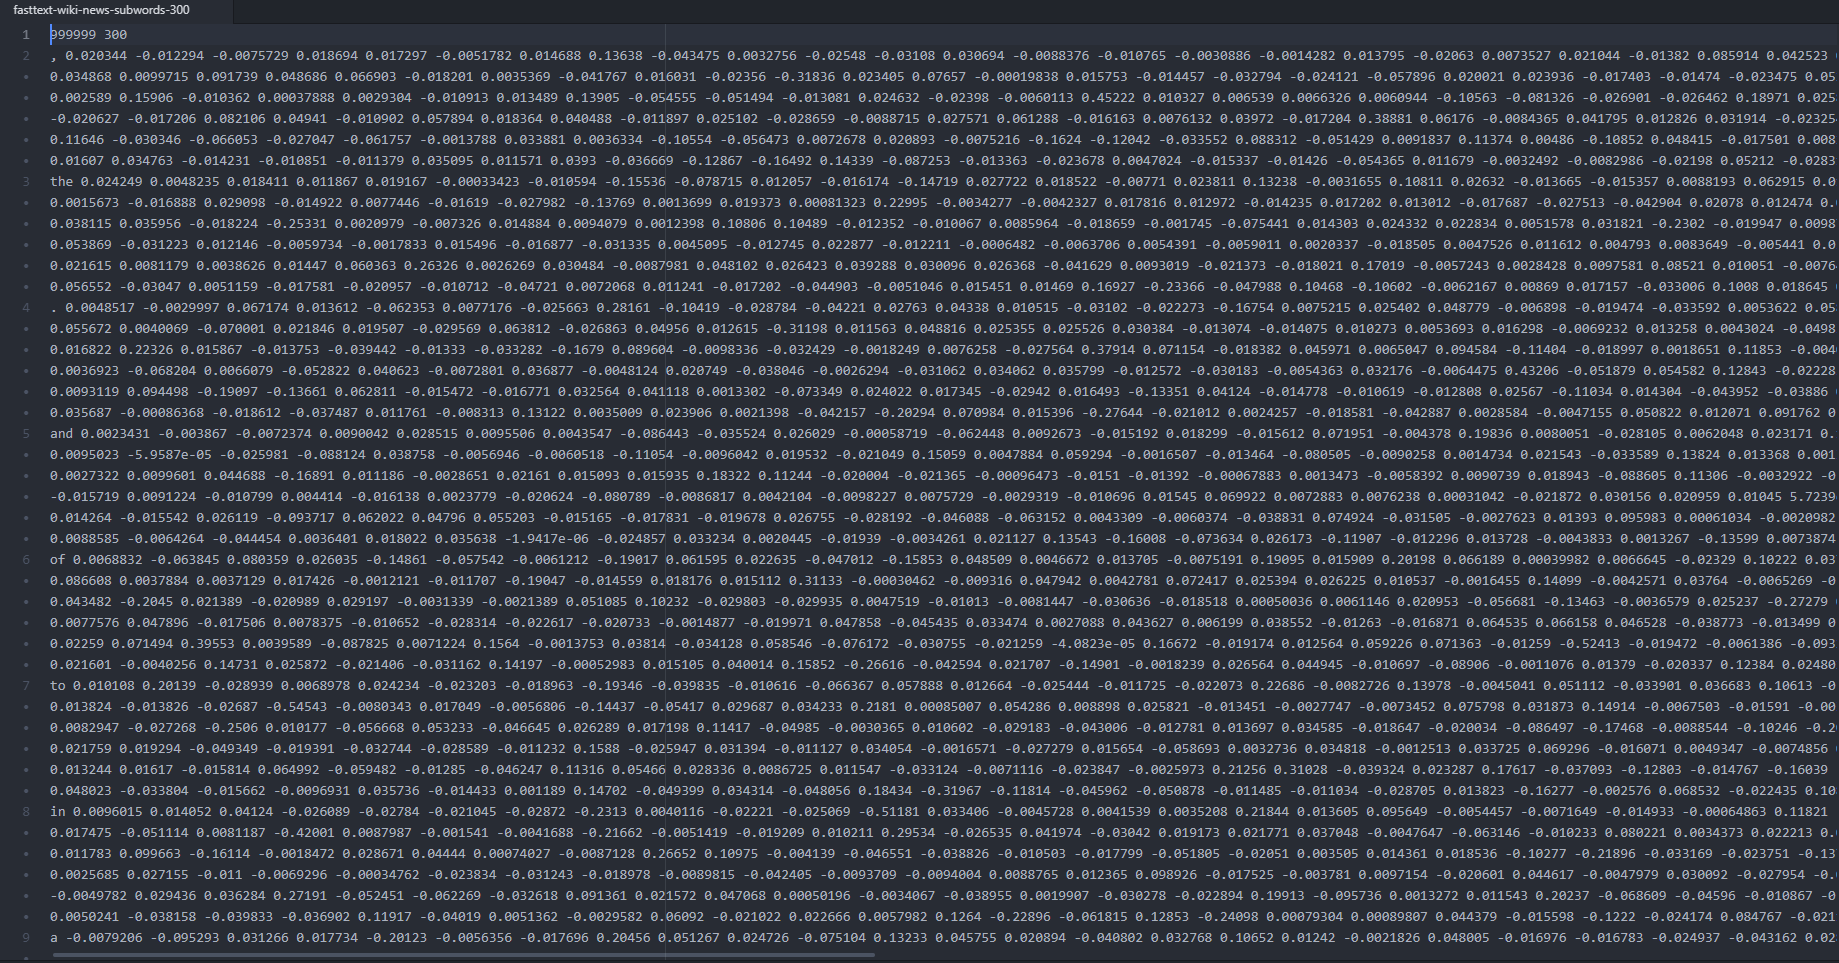

In [20]:
fasttext_model300.most_similar(positive=['sport'], topn = 7)

[('sports', 0.8734080791473389),
 ('non-sport', 0.8134778738021851),
 ('sporting', 0.7916890382766724),
 ('sport-', 0.7534786462783813),
 ('non-sporting', 0.7505502700805664),
 ('sport-related', 0.7370049953460693),
 ('sport.', 0.7366814613342285)]

In [21]:
labels = []   
tokens = []  
'''The vocabulary is in the vocab field of the Word2Vec model's wv property, as a dictionary, with 
the keys being each token (word).'''
for word in model.wv.vocab:  #model.wv is the mapping between word and vectors (keyed vector) we discussed in above cell also
    tokens.append(model[word])   #This is array of the features of the word
    labels.append(word)   #And this is list of course

C:\Users\tranq\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


No need to implement TSNE by your own. But if you feel confindent, try writing code of your own. 

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []   
    tokens = []   

    '''The vocabulary is in the vocab field of the Word2Vec model's wv property, as a dictionary, with 
    the keys being each token (word).'''
    for word in model.wv.vocab:  #model.wv is the mapping between word and vectors (keyed vector) we discussed in above cell also
        tokens.append(model[word])   #This is array of the features of the word
        labels.append(word)   #And this is list of course
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state = 0) #Try varying n_iter & perplexity
    new_values = tsne_model.fit_transform(tokens)  

    x = []   #Are these the x and y coordinates ?
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12))   #Make figure little bigger/smaller ?
    for i in range(len(x)):
        plt.scatter(x[i],y[i])    
        plt.annotate(labels[i],     
                     xy=(x[i], y[i]),
                     xytext=(5, 5),
                     textcoords='offset pixels',
                     ha='left',
                     va='top')
    


    plt.show()


C:\Users\tranq\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


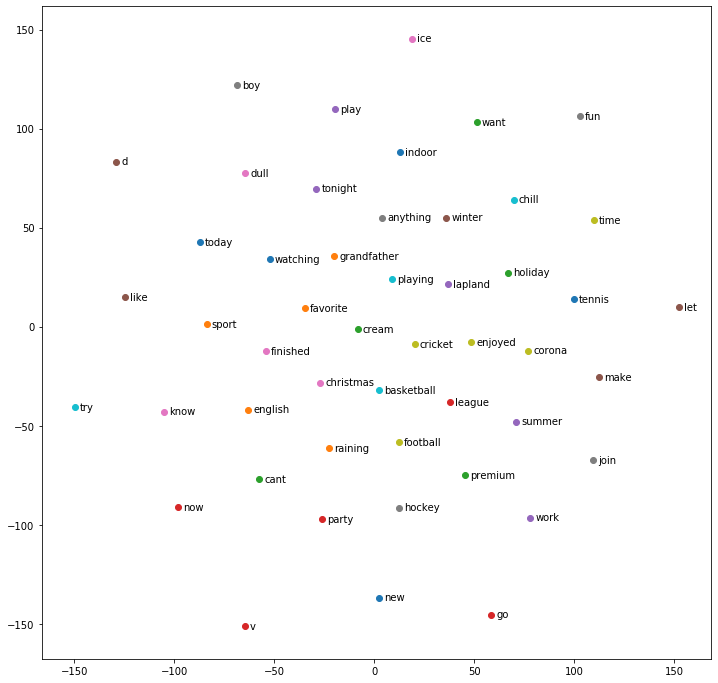

In [23]:
tsne_plot(model)

Now that we have a large corpus from exercise#1 in this notebook, lets try plotting them (This time try coding yourself)

In [24]:
#### Your Code goes here 

Q: Is it possible to plot the fasttext_model300 ?

Let's Play the Odd one out game 

In [25]:
fasttext_model300.doesnt_match("cat dog bone rabbit".split())

C:\Users\tranq\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'bone'

Cool! Create some of your own now 

Now Lets try one powerful feature possible from word embeddings

In [26]:
fasttext_model300.most_similar(['cat','dog'])

[('cats', 0.7978489995002747),
 ('dogs', 0.7878663539886475),
 ('puppy', 0.7869204878807068),
 ('dogs-', 0.7802255153656006),
 ('pet', 0.775253415107727),
 ('beagle', 0.7698754072189331),
 ('labrador', 0.7631130218505859),
 ('kitten', 0.7627809047698975),
 ('housecat', 0.7518125772476196),
 ('staffy', 0.7477413415908813)]

In [27]:
fasttext_model300.most_similar(positive=['woman','king'], negative=['man'], topn = 5) 

[('queen', 0.778674840927124),
 ('queen-mother', 0.7143871188163757),
 ('king-', 0.6981282234191895),
 ('queen-consort', 0.6724598407745361),
 ('monarch', 0.666700005531311)]

Q: What is the parameter negative doing ?

Dont wait! Try something more!!

In [28]:
fasttext_model300.most_similar(['Kathmandu','Helsinki'], topn=10)  #Lets try now what is the similarities between two capitals

[('Katmandu', 0.7372826933860779),
 ('Stockholm', 0.6841224431991577),
 ('Bangkok', 0.6750401258468628),
 ('Pokhara', 0.673894464969635),
 ('Stockholm-Arlanda', 0.6669442057609558),
 ('Finland', 0.6629941463470459),
 ('Kamppi', 0.6556113362312317),
 ('Tampere', 0.6543558835983276),
 ('Delhi', 0.6527150869369507),
 ('Toijala', 0.6506778001785278)]

What do you think could be the score beside each City?

In [29]:
fasttext_model300.most_similar(positive=['Tokyo','Finland'], negative=['Helsinki'], topn = 1)
#What are we doing ? Subtracting Tokyo and Finland from Helsinki ?

[('Japan', 0.8723644614219666)]

What do you think the above code is doing ? 

What do you think is the default value of topn ?

In [30]:
fasttext_model300.most_similar(positive=['Helsinki','Finland', 'Germany'], negative=['Berlin', 'Sweeden'])
#What the heck did I do and what did i get ?

[('Turku', 0.6103343963623047),
 ('Oulu', 0.5967726707458496),
 ('Finnish', 0.5943154692649841),
 ('Finnish-speaking', 0.5740379095077515),
 ('Finnland', 0.5694271326065063),
 ('Jyväskylä', 0.5682488679885864),
 ('Finlands', 0.5638313889503479),
 ('Kuopio', 0.5532369613647461),
 ('Sweden', 0.5465379953384399),
 ('Tampere', 0.5453804135322571)]

In [31]:
from textblob import TextBlob

text = "My Text goes here. Mr Jack is a good player and he is a social boy. I think in future he will be a good national ice hockey player. I just wish he doesnt earn bad name due to losing some games."

blob = TextBlob(text)
blob.tags  #This will give all of the tags, i.e. Parts of Speech          
#blob.words.count('My')

[('My', 'PRP$'),
 ('Text', 'NN'),
 ('goes', 'VBZ'),
 ('here', 'RB'),
 ('Mr', 'NNP'),
 ('Jack', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('player', 'NN'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('social', 'JJ'),
 ('boy', 'NN'),
 ('I', 'PRP'),
 ('think', 'VBP'),
 ('in', 'IN'),
 ('future', 'NN'),
 ('he', 'PRP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('national', 'JJ'),
 ('ice', 'NN'),
 ('hockey', 'NN'),
 ('player', 'NN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('wish', 'VB'),
 ('he', 'PRP'),
 ('doesnt', 'VB'),
 ('earn', 'RB'),
 ('bad', 'JJ'),
 ('name', 'NN'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('losing', 'VBG'),
 ('some', 'DT'),
 ('games', 'NNS')]

Check out the meaning of the tags:

- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective ‘big’
- JJR adjective, comparative ‘bigger’
- JJS adjective, superlative ‘biggest’
- LS list marker 1)
- MD modal could, will
- NN noun, singular ‘desk’
- NNS noun plural ‘desks’
- NNP proper noun, singular ‘Harrison’
- NNPS proper noun, plural ‘Americans’
- PDT predeterminer ‘all the kids’
- POS possessive ending parent‘s
- PRP personal pronoun I, he, she

- PRP$ possessive pronoun my, his, hers

- RB adverb very, silently,
- RBR adverb, comparative better
- RBS adverb, superlative best
- RP particle give up
- TO to go ‘to‘ the store.
- UH interjection errrrrrrrm
- VB verb, base form take
- VBD verb, past tense took
- VBG verb, gerund/present participle taking
- VBN verb, past participle taken
- VBP verb, sing. present, non-3d take
- VBZ verb, 3rd person sing. present takes
- WDT wh-determiner which
- WP wh-pronoun who, what

- WP$ possessive wh-pronoun whose

- WRB wh-abverb where, when

In [32]:
blob.noun_phrases   #This will give you the noun phrases only

WordList(['text', 'mr jack', 'good player', 'social boy', 'good national ice hockey player', 'bad name'])

You will come across many websites which classify text realtime, or which can do realtime sentiment analysis. We cant do this as it is out of the scope of our course. But lets try something here. Try typing your text here and determine if it is a positive or a negative sentiment type. (Recall what is polarity and what is subjectivity)

In [33]:
# blob.sentences # We have three sentences which we can access easily using the blob object
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)  #This prints the polarity of all the three sentences

0.0
0.36666666666666664
0.35
-0.4124999999999999


So what can you intrepret ? Is it possible to say if the sentence is neutral, positive or negative ?

In [34]:
polarity = []
for index,sentence in enumerate(blob.sentences):
    print(sentence,':',sentence.sentiment.polarity)
    polarity.append(sentence.sentiment.polarity)
    
print()

for idx,sentiment in enumerate(polarity):
    if sentiment < 0.1 and sentiment >-0.1:
        print(polarity[idx],"neutral")
    elif sentiment > 0.1:
        print(polarity[idx],"positive")
    else:
        print(polarity[idx],"negative")

My Text goes here. : 0.0
Mr Jack is a good player and he is a social boy. : 0.36666666666666664
I think in future he will be a good national ice hockey player. : 0.35
I just wish he doesnt earn bad name due to losing some games. : -0.4124999999999999

0.0 neutral
0.36666666666666664 positive
0.35 positive
-0.4124999999999999 negative


In [35]:
polarity = []
for sentence in blob.sentences:
    if sentence.sentiment.polarity < 0.1 and sentence.sentiment.polarity >-0.1:
        print(sentence,': has score of',sentence.sentiment.polarity,' - Is a neutral statement')
    elif sentence.sentiment.polarity > 0.1:
        print(sentence,': has score of',sentence.sentiment.polarity,' - Is a positive statement')
    else:
        print(sentence,': has score of',sentence.sentiment.polarity,' - Is a negative statement')

My Text goes here. : has score of 0.0  - Is a neutral statement
Mr Jack is a good player and he is a social boy. : has score of 0.36666666666666664  - Is a positive statement
I think in future he will be a good national ice hockey player. : has score of 0.35  - Is a positive statement
I just wish he doesnt earn bad name due to losing some games. : has score of -0.4124999999999999  - Is a negative statement


There are a  lot of fancy things we can try with textblog. 
Check out this guide and try at least 5 stuffs that intrigues you. 

https://textblob.readthedocs.io/en/dev/quickstart.html

Lets follow this article:

https://towardsdatascience.com/building-a-speech-recognizer-in-python-2dad733949b4

You can try implementing that if you want. 
    

Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning. Gensim is implemented in Python and Cython. [Wikipedia]

Used for: Creating and querying corpus

Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between terms in a corpus. For example, the distance between the two words 'India' and 'New Delhi' might be similar to the distance between 'China' and 'Beijing', as these represent the 'Country-Capital' vectors.